<h1 style='color:red' align='center'>Task 1: Iris Flower Classification</h1>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/pc/Desktop/Internship @CodeAlpha/Task1/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# number of rows and columns 
df.shape

(150, 5)

## Basic Exploratory Data Analysis (EDA)

In [3]:
# Overview of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Distribution of Species

In [5]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

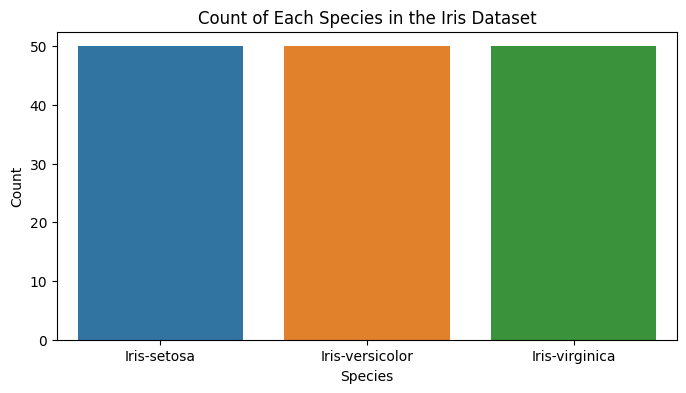

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(x='species', data=df, hue='species')

plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Count of Each Species in the Iris Dataset")
plt.show()

## Pairplot to Visualize Relationships

This gives a grid of scatterplots (and KDE plots on the diagonal) to see how each pair of features separates the three species.

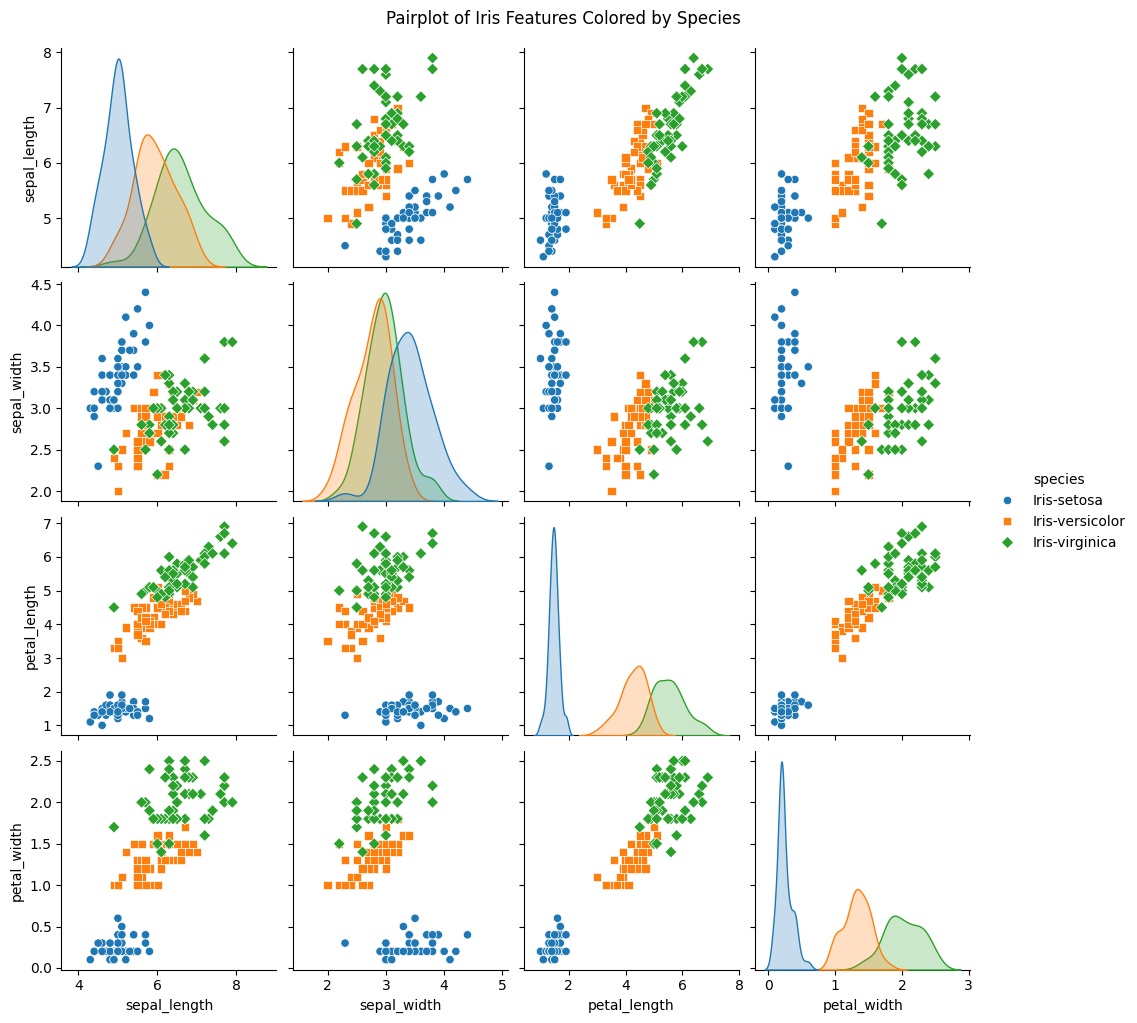

In [7]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"], diag_kind="kde")
plt.suptitle("Pairplot of Iris Features Colored by Species", y=1.02)
plt.show()

##  Boxplots to Compare Distributions

#### Boxplots allow you to see how each feature is distributed across the species.

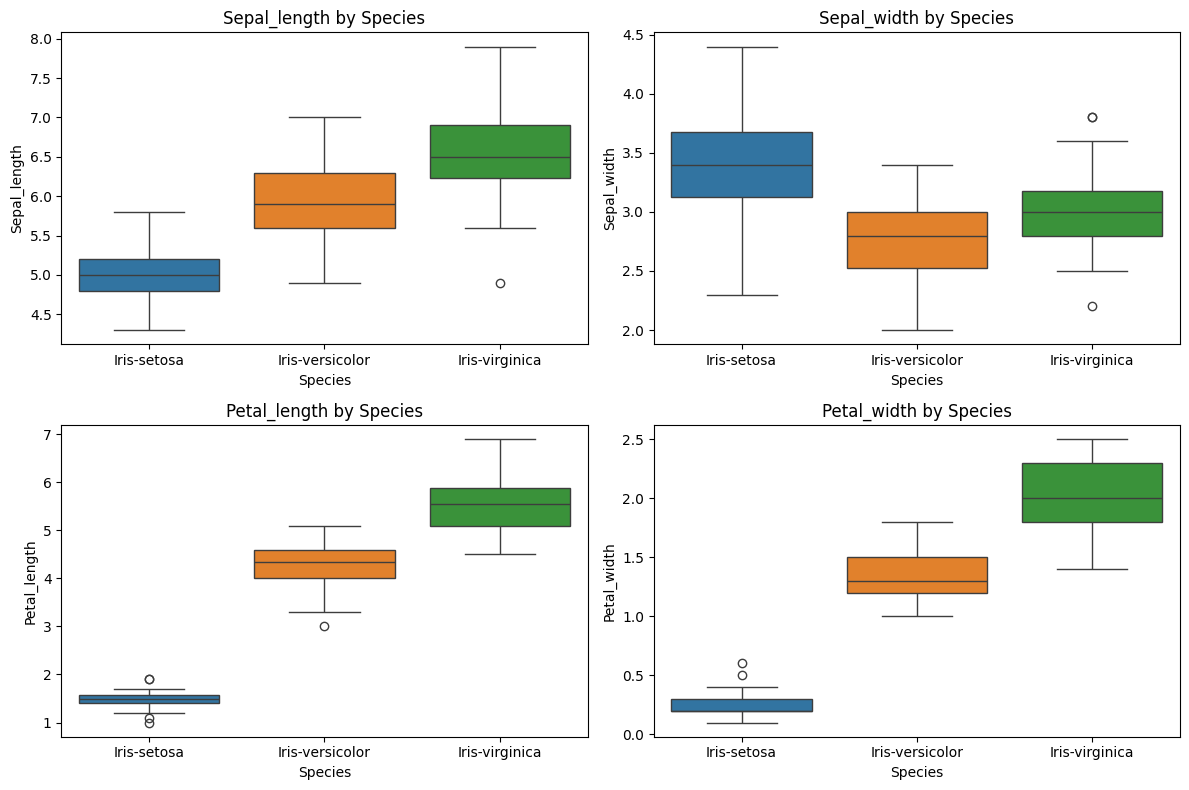

In [31]:
plt.figure(figsize=(12, 8))
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for i, feature in enumerate(features, 1):
    ax = plt.subplot(2, 2, i)
    # Use 'hue' to assign the color mapping and set dodge=False to avoid separation
    sns.boxplot(x="species", y=feature, data=df, hue="species", ax=ax, legend=False) 
    
    ax.set_title(f"{feature.capitalize()} by Species")
    ax.set_xlabel("Species")
    ax.set_ylabel(feature.capitalize())

plt.tight_layout() # Adjusts subplot spacing to prevent overlapping elements (like axis labels or titles).
plt.show()

## Violin Plots for Detailed Distributions

#### Violin plots combine boxplots and kernel density plots to provide more insight into the distribution shape.

### What a Violin Plot Tells You
Distribution Shape

The width of the violin at different values shows the density of data points.
A wide section means more data points are concentrated there.
A narrow section means fewer data points exist at that value.
Median and Quartiles

Many violin plots include a mini boxplot inside to show the median and interquartile range (IQR).
This helps compare both central tendency (median) and spread.
Symmetry vs. Skewness

If the violin is symmetrical, the data is evenly distributed.
If it is skewed, the distribution is unbalanced.
Multi-modal Distributions

Unlike a boxplot, a violin plot can show multiple peaks (modes) in the data.
If a violin has multiple bulges, it indicates multiple groups in the data.


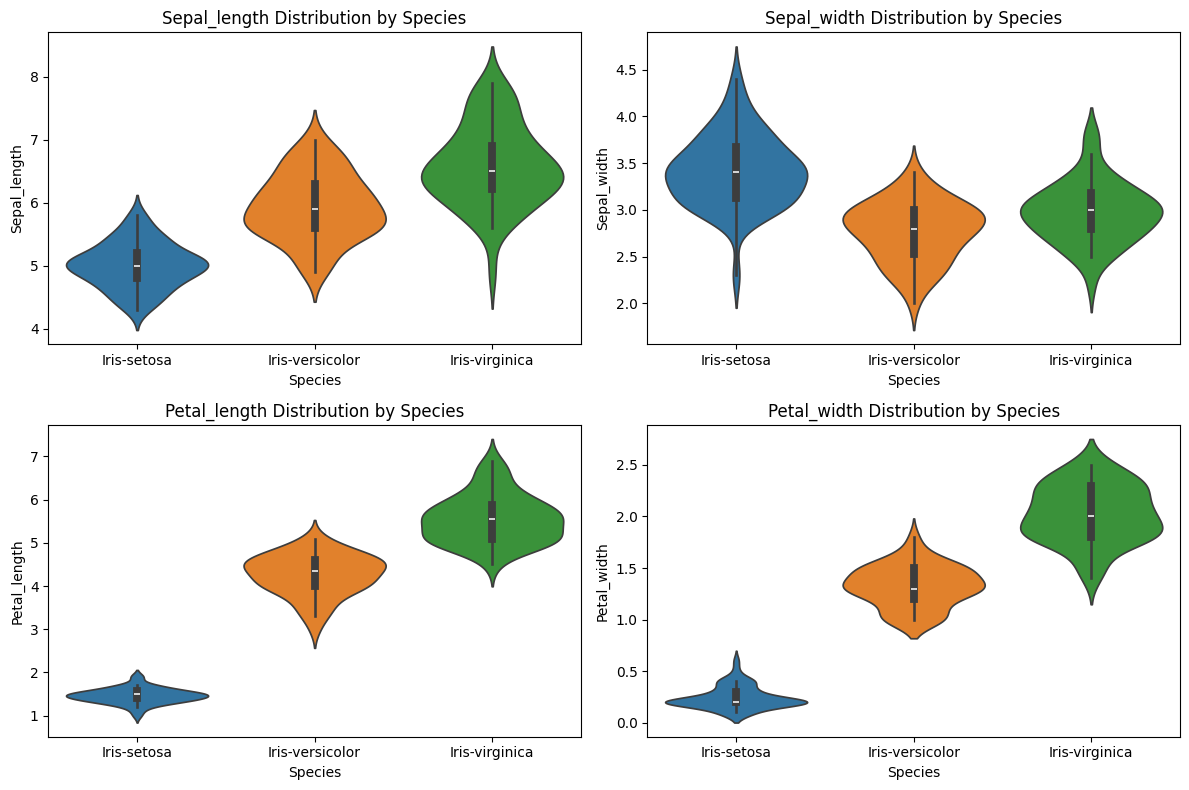

In [30]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    ax = plt.subplot(2, 2, i)
    # Assign hue to 'species' and set dodge=False so the plot doesn't separate further.
    sns.violinplot(x="species", y=feature, data=df, hue="species", ax=ax, legend=False)
    
    ax.set_title(f"{feature.capitalize()} Distribution by Species")
    ax.set_xlabel("Species")
    ax.set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

# Data Preparation

## 1. Split Features (X) and Target (y)

In [33]:
X = df.drop("species", axis=1)  # all columns except 'species'
y = df["species"]              # the target column

## 2. Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing (you can adjust the test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determining the best model with GridSearchCV

In [35]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Define a dictionary of models and their respective hyperparameter grids
models_param_grid = {
    "LogisticRegression": (
        LogisticRegression(max_iter=1000),
        {
            "penalty": ["l1", "l2"],
            "C": [0.1, 1, 10],
            "solver": ["liblinear", "saga"]
        }
    ),
    "DecisionTree": (
        DecisionTreeClassifier(),
        {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 5, 10]
        }
    ),
    "RandomForest": (
        RandomForestClassifier(),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 5, 10]
        }
    ),
    "SVM": (
        SVC(),
        {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf", "poly"]
        }
    )
}

# Perform GridSearchCV for each model and store the best estimators
best_models = {}
for model_name, (model, param_grid) in models_param_grid.items():
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    # Save the best estimator for the current model
    best_models[model_name] = grid_search.best_estimator_
    
    print(f"{model_name} | Best Params: {grid_search.best_params_}")
    print(f"{model_name} | Best CV Score: {grid_search.best_score_}\n")

# Evaluate each best model on the test set
best_score = 0
best_model_name = None

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test Accuracy: {acc}")
    if acc > best_score:
        best_score = acc
        best_model_name = model_name

print(f"\nBest overall model on the test set: {best_model_name} with accuracy {best_score}")

LogisticRegression | Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
LogisticRegression | Best CV Score: 0.9666666666666668

DecisionTree | Best Params: {'criterion': 'gini', 'max_depth': None}
DecisionTree | Best CV Score: 0.95

RandomForest | Best Params: {'max_depth': None, 'n_estimators': 50}
RandomForest | Best CV Score: 0.95

SVM | Best Params: {'C': 1, 'kernel': 'linear'}
SVM | Best CV Score: 0.9583333333333334

LogisticRegression Test Accuracy: 1.0
DecisionTree Test Accuracy: 1.0
RandomForest Test Accuracy: 1.0
SVM Test Accuracy: 1.0

Best overall model on the test set: LogisticRegression with accuracy 1.0


### In this multi-model approach:

#### We define a dictionary that maps each model name to a tuple of (model_instance, param_grid).
#### For each model:
    We perform a grid search using 5-fold cross-validation.
    We retrieve the best estimator (model + hyperparameters) and store it.
#### Finally, we test each best estimator on the test set and pick the overall best model.

In [40]:
# --- Now, perform 10-fold cross-validation on the best Logistic Regression model ---
# Get the best Logistic Regression model from our dictionary
best_model = best_models.get(best_model_name)

cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
print("\nCross-validation scores for the best Logistic Regression model:", cv_scores)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores)))



Cross-validation scores for the best Logistic Regression model: [1.         1.         1.         1.         0.93333333 1.
 0.86666667 1.         1.         1.        ]
Mean cross-validation accuracy: 0.98


##  Now we train our best Model

In [41]:
# Fit the best model on the full training data
best_model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, solver='saga')

## Using confusion matrix to determine the accuracy of our models prediction

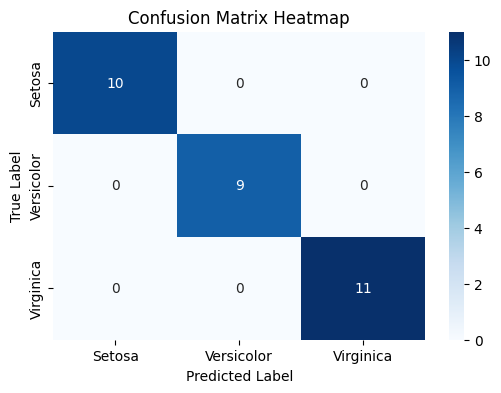

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
class_labels = ["Setosa", "Versicolor", "Virginica"]
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [16]:
# Compute Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)



Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Making Predictions on new data

Predicted species: Iris-virginica


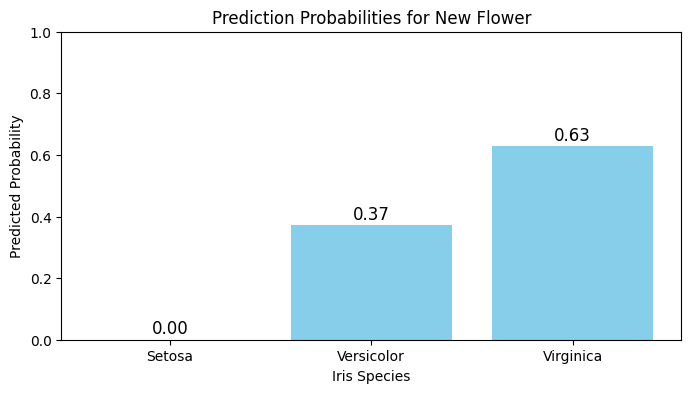

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example new data: a flower with these measurements
new_flower = np.array([[6.1, 3.0, 4.9, 1.8]])

# Define the feature names (same as used during training)
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Convert new_flower into a DataFrame with proper column names
new_flower_df = pd.DataFrame(new_flower, columns=feature_names)

# Use the best model (assumed to be already trained)
prediction = best_model.predict(new_flower_df)
print("Predicted species:", prediction[0])

# Get the predicted probabilities for the new flower
pred_probs = best_model.predict_proba(new_flower_df)[0]

# Create a bar chart to visualize the prediction probabilities
plt.figure(figsize=(8, 4))
plt.bar(class_labels, pred_probs, color="skyblue")
plt.xlabel("Iris Species")
plt.ylabel("Predicted Probability")
plt.title("Prediction Probabilities for New Flower")
plt.ylim([0, 1])

# Annotate bars with probability values
for i, prob in enumerate(pred_probs):
    plt.text(i, prob + 0.02, f"{prob:.2f}", ha='center', fontsize=12)

plt.show()


In [18]:
pred_probs

array([1.66289542e-04, 3.72110756e-01, 6.27722954e-01])

Predicted species for each flower:
Flower 1: Iris-versicolor
Flower 2: Iris-setosa
Flower 3: Iris-virginica
Flower 4: Iris-virginica


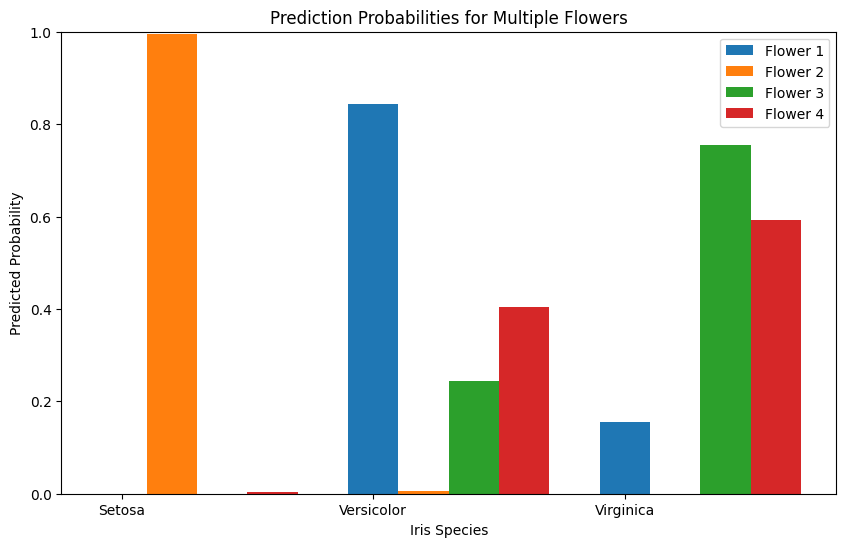

In [19]:
# Example new data: multiple flowers with different measurements
new_flowers = np.array([
    [6.1, 3.0, 4.9, 1.4],  # Flower 1
    [5.0, 3.4, 1.5, 0.2],  # Flower 2
    [6.3, 2.7, 4.9, 1.8],  # Flower 3
    [4.2, 3.6, 4.1, 2.0]   # Flower 4
])

# Define the feature names (same as used during training)
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Convert new_flowers into a DataFrame with proper column names
new_flowers_df = pd.DataFrame(new_flowers, columns=feature_names)

# Use the best model (assumed to be already trained)
predictions = best_model.predict(new_flowers_df)
pred_probs = best_model.predict_proba(new_flowers_df)  # Get prediction probabilities

# Print predictions for each flower
print("Predicted species for each flower:")
for i, species in enumerate(predictions):
    print(f"Flower {i+1}: {species}")

# Visualizing the prediction probabilities for all flowers
plt.figure(figsize=(10, 6))

for i, probs in enumerate(pred_probs):
    plt.bar(np.arange(len(class_labels)) + i * 0.2, probs, width=0.2, label=f'Flower {i+1}')

plt.xticks(np.arange(len(class_labels)), class_labels)
plt.xlabel("Iris Species")
plt.ylabel("Predicted Probability")
plt.title("Prediction Probabilities for Multiple Flowers")
plt.ylim([0, 1])
plt.legend()
plt.show()


In [20]:
pred_probs

array([[3.86439104e-04, 8.43341728e-01, 1.56271833e-01],
       [9.95017711e-01, 4.98228933e-03, 1.51878267e-12],
       [5.86711038e-05, 2.44186149e-01, 7.55755180e-01],
       [4.11125620e-03, 4.04072743e-01, 5.91816001e-01]])

In [21]:
# Add predictions as a new column in the DataFrame
new_flowers_df["Predicted Species"] = predictions

# Print the updated DataFrame
print("Predictions with flower measurements:")
new_flowers_df

Predictions with flower measurements:


,sepal_length,sepal_width,petal_length,petal_width,Predicted Species
0,6.1,3.0,4.9,1.4,Iris-versicolor
1,5.0,3.4,1.5,0.2,Iris-setosa
2,6.3,2.7,4.9,1.8,Iris-virginica
3,4.2,3.6,4.1,2.0,Iris-virginica


### this code below help use relate our predictions to our original iris-flower dataset 

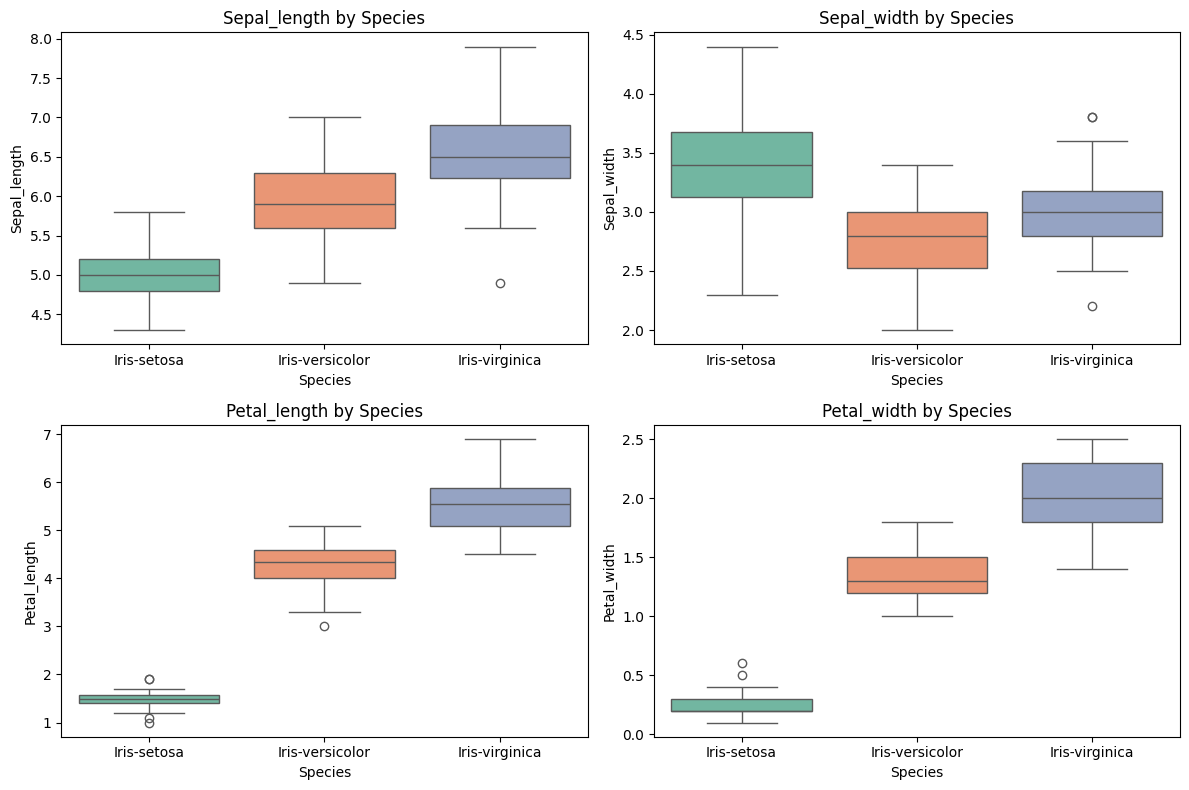

In [22]:
plt.figure(figsize=(12, 8))
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for i, feature in enumerate(features, 1):
    ax = plt.subplot(2, 2, i)
    # Use 'hue' to assign the color mapping and set dodge=False to avoid separation
    sns.boxplot(x="species", y=feature, data=df, hue="species", palette="Set2", dodge=False, ax=ax)
    # Remove the redundant legend
    if ax.get_legend():
        ax.get_legend().remove()
    ax.set_title(f"{feature.capitalize()} by Species")
    ax.set_xlabel("Species")
    ax.set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()